In [1021]:
import numpy as np
import matplotlib.pyplot as plt

In [1022]:
import numpy as np
import matplotlib.pyplot as plt

In [1023]:
import os
import shutil
import time

In [1024]:
dir_save = "../../.saves/" + "T=10 A=0.2 Cave=1 from tanh/" 

In [1025]:
Cave = 1
A = 0.2
T = 10
eps = 2*np.pi/T

def beta1eps(t):
    return 0.5*eps*A*np.cos(eps*t)/((Cave+A*np.sin(eps*t))**(3/2))


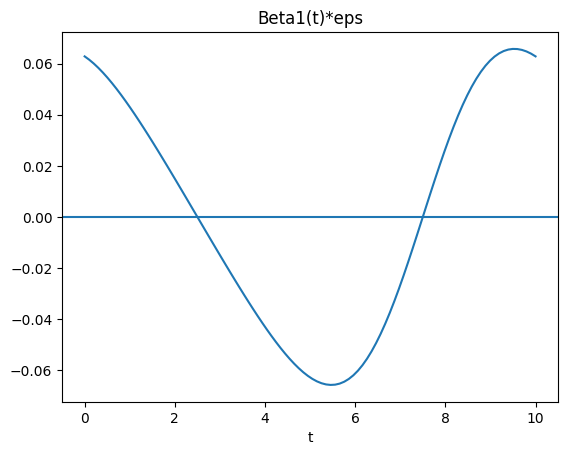

In [1026]:
# Analytical beta1(t)
ttts = np.linspace(0,10,100)
bbbs = np.zeros(len(ttts))
for i in np.arange(0,len(bbbs)):
    bbbs[i] = beta1eps(ttts[i])

plt.plot(ttts, bbbs)
plt.title("Beta1(t)*eps")
plt.xlabel("t")
plt.axhline(0)

In [1027]:
# Parameters for beta1 extimation
dx = 0.1
L = 1000
xplateau = L/2 + 20
iplateau = int(xplateau/dx)

ts = []             # Instants t of the beta1*eps extimates
beta1s_eps = []     # beta1*eps

In [1028]:
title = "C(t) = " + str(Cave) + " + " + str(A) + "sin(2pi t/T)\n T = " + str(T) + "\n$\epsilon = 2pi/T = $" + str(eps) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


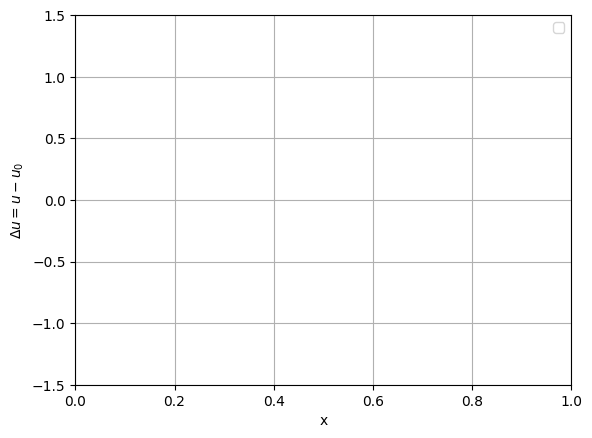

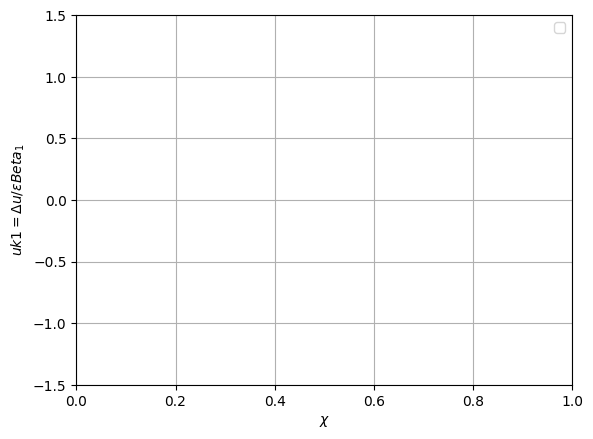

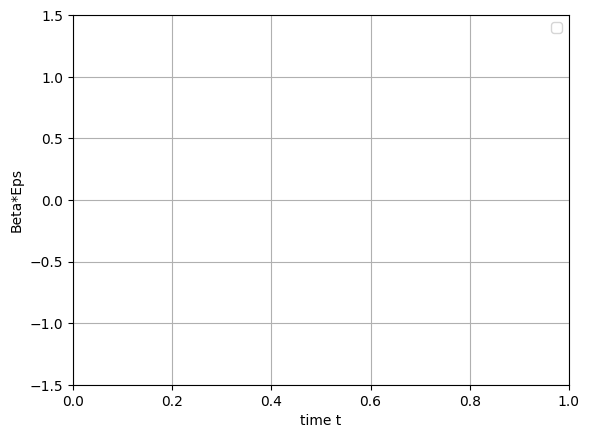

In [1029]:
#title = "$C(t) = 1 + 0.2\sin(2\pi t/T)$\n $T = 100 \eps = 2\pi/T$\n $u = \sqrt{C}u_{k_0}(\sqrt{C/2}x) + \eps u_1 + ...$ \n"

# Create plot object for distance from the stationary state
fig_d, ax_d = plt.subplots()
ax_d.set_xscale("linear")
ax_d.set_xlabel("x")
ax_d.set_ylabel("$\Delta u = u - u_0$")
ax_d.set_yscale("linear")
ax_d.set_ylim(-1.5,1.5)
ax_d.legend()
ax_d.grid()

# Create plot object for RESCALED distance from the stationary state (u_{k_1}(\chi) Extimation)
fig_r, ax_r = plt.subplots()
ax_r.set_xscale("linear")
ax_r.set_xlabel("$\chi$")
ax_r.set_ylabel("$uk1 = \Delta u/\epsilon Beta_1$")
ax_r.set_yscale("linear")
ax_r.set_ylim(-1.5,1.5)
ax_r.legend()
ax_r.grid()

# Create plot object for Extimations of beta1
fig_b, ax_b = plt.subplots()
ax_b.set_xscale("linear")
ax_b.set_xlabel("time t")
ax_b.set_ylabel("Beta*Eps")
ax_b.set_yscale("linear")
ax_b.set_ylim(-1.5,1.5)
ax_b.legend()
ax_b.grid()

#ax_d.set_title(title)
#ax_b.set_title(title)

In [1030]:
# Choose at what instants plot the deviation curve
plot_list = [1, 2, 3, 4]

In [1031]:
# Select the plot xspan
xspan = 100
xmin = L/2 - xspan/2
xmax = L/2 + xspan/2

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    #print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx_, dt_, seed_, A_, Thalf_, Cave_ = row.split(" ")
            N = int(N)
            x = np.zeros(N)
            y = np.zeros(N)
            tmax = float(tmax)
        i = i + 1

    #x = x[0:i]
    f.close()
    
    # Label with the state's time
    state_time = tmax 
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    # Get custom label of the curve (use it only if it is not empty)
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()
    if label != "":
        labell = label
    
    # Get last value of C (C at the time of the plotted state)
    f = open(dir + "/fileCout.dat", "r")
    cont_row = 0    # Control if there is at least one value of C inside fileCout
    for row in f:
        tt, C = row.split(" ") #Only the last row is interesting
        cont_row = cont_row + 1
    if cont_row == 0:
        exit("Specify the value of C!!!")
    C = float(C)
    #print("C = " + str(C) + " folder = " + str(dir))

    # Deviation from stationary state
    y_stat_state = np.sqrt(C)*np.tanh((x-L/2*np.ones(N))*np.sqrt(C/2))
    deviation = y - y_stat_state
    # Rescaled deviation (u_k1 extimate)
    chi = (x - L/2*np.ones(N))*np.sqrt(C)
    uk1 = np.zeros(N)
    if np.abs(beta1eps(state_time)) > 1e-10:             # Otherwise beta1 is 0 and you cannot divide by it
        for i in np.arange(0, N):
            uk1[i] = deviation[i]/beta1eps(state_time)
            #uk1[i] = deviation[i]/(deviation[iplateau]*(-2))
    # Plot deviation (and rescaled version)
    if plot_list.__contains__(state_time) and np.abs(C) > 1e-5:   # If C=0 then the rescaled width is infinite!
        ax_d.plot(x, deviation, label = labell)
        if np.abs(beta1eps(state_time)) > 1e-10:
            ax_r.plot(chi, uk1, label = labell)
        else:
            ax_r.plot(chi, np.zeros(N), "--", label = "")   # To have color correspondence with the non-rescaled diagram
    # Measure beta_1
    #print("Deviation: " + str(deviation[iplateau]*(-2)))
    beta1s_eps.append(deviation[iplateau]*(-2))
    ts.append(state_time)
    

print(xplateau)
ax_d.axvline(xplateau)
#eps = 0.5
#plt.ylim(-1-eps,1+eps)

520.0


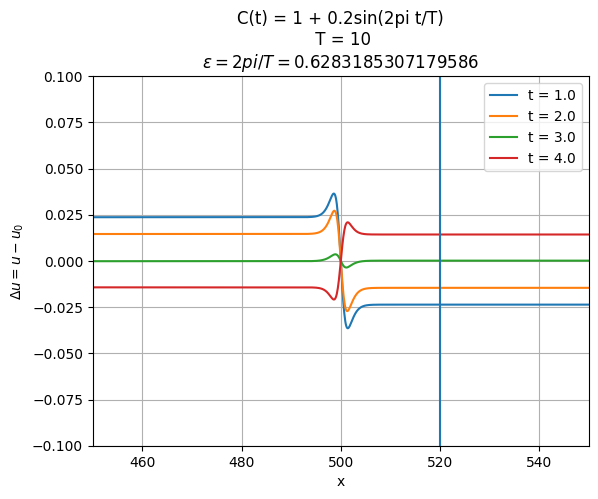

In [1032]:
toll = 0.1
ax_d.set_ylim(-toll,toll)
ax_d.set_title(title)
ax_d.legend()
ax_d.set_xlim(xmin, xmax)
fig_d

In [1033]:
# Add NDSolve solution to u_k1 ODE among the uk1 extimations
	
f = open("../../misc/NDSolve u_k1 ODE vel = -1.12491.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    a, b = row.split("	")
    x[i-1] = float(a)
    y[i-1] = float(b)
    i = i + 1
x = x[0:i-1]
y = y[0:i-1]

ax_r.plot(x, y, "--", label= "NDSolve vel = -1.12491")


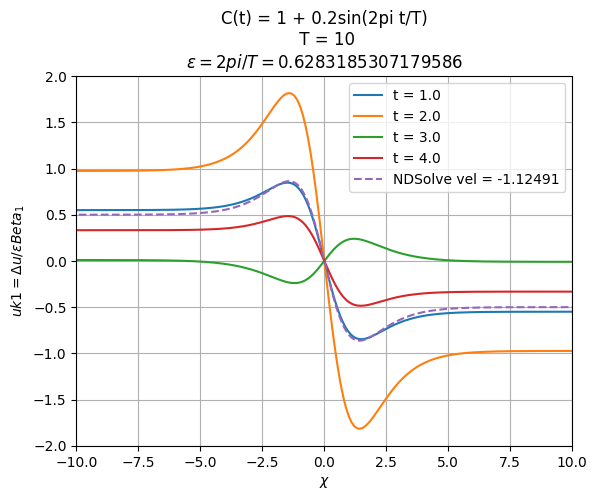

In [1034]:
toll2 = 2
chispan = 20
ax_r.set_ylim(-toll2,toll2)
ax_r.set_title(title)
chimin = - chispan/2
chimax = + chispan/2
ax_r.set_xlim(chimin, chimax)
ax_r.legend()
fig_r

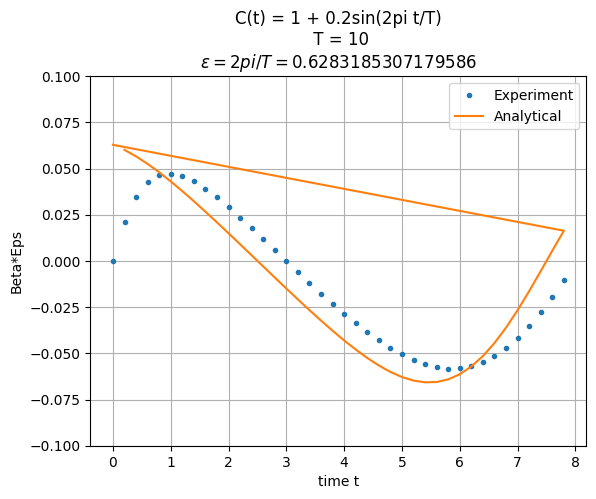

In [1035]:
# Experimental measured beta1*eps (from plateau value)
ax_b.plot(ts, beta1s_eps, ".", label = "Experiment")
# Analytical expression for beta1*eps
beta1s_eps_anal = np.zeros(len(ts))
for i in np.arange(0, len(ts)):
    beta1s_eps_anal[i] = beta1eps(ts[i])
ax_b.plot(ts, beta1s_eps_anal, label="Analytical")

ax_b.set_ylim(-toll, toll)
ax_b.legend()
ax_b.set_title(title)

fig_b